# CapStone Project 

## Topic: House Price prediction

In [4]:
#Importing the necessary packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Loading Training dataset into dataframe
df= pd.read_csv('capstone_data/train.csv')

In [6]:
# First 5 rows in the DataFrame
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
#DataFrame shape
df.shape

(1460, 81)

In [5]:
# DataFrame Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
# Finding the NULL entries per columns
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

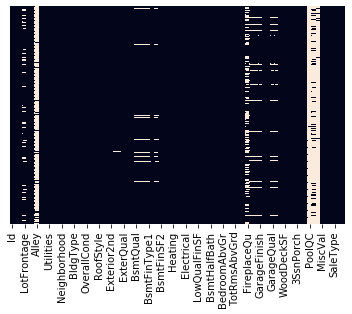

In [8]:
#Creating a heapmap plotting the NULL entries in the columns.
# The white bar represents the missing values.
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)

In [9]:
# Taking care of the missing values/ features in the same order as they appear.

# Handling LotFrontage, replace NULL values with mean
df['LotFrontage']= df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['MasVnrArea']= df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

# Handling FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond
df['FireplaceQu']= df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['BsmtQual']= df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond']= df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtExposure']= df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1']= df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2']= df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['MasVnrType']= df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['GarageType']= df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageYrBlt']= df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0])
df['GarageFinish']= df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']= df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']= df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['Electrical']= df['Electrical'].fillna(df['Electrical'].mode()[0])



In [10]:
# Handling Alley, PoolQC, Fence, MiscFeature, dropping the column itself.
df.drop(['Alley'],axis=1,inplace=True)
df.drop(['PoolQC', 'Fence', 'MiscFeature'],axis=1,inplace=True)


In [11]:
# Cleaned DataFrame Verification #1
# As seen, no NULL values could be observed.
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
                ..
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch   

In [11]:
# Cleaned DataFrame verification #2
#As shown, all the columns contain 1460 non-null entries.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

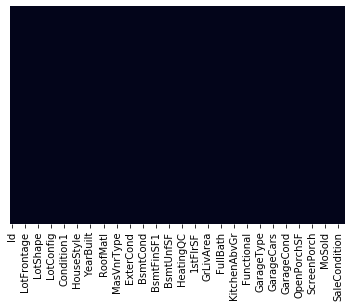

In [12]:
# Cleaned DataFrame Verification #3
# Checking the same graphically.
# Comparing the generated heatmap from the one generated above, We could observe no NULL entries here.
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [13]:
# Getting the new DataFrame shape
df.shape

(1460, 77)

In [14]:
# First 10 entries in the DataFrame
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [15]:
# Initial EDA

# Generating Mean, Median, Mode, Min, Max and Quantiles
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


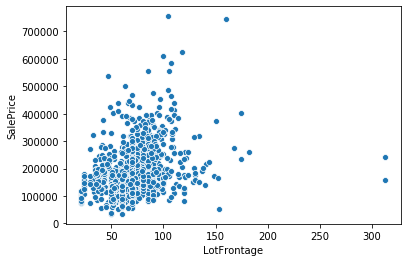

In [16]:
#Plotting a box plot to record the outlier detection for LotFrontage vs Saleprice
sns.scatterplot(y='SalePrice', x='LotFrontage', data=df)
plt.show()

In [30]:
#Taking care of the outliers

def remove_outliers(df):
    outliers={}
    
    for col in df.columns:
        
        if str(df[col].dtypes) != 'object':
            df = df[np.abs(df[col]-df[col].mean()) < (3 * df[col].std())]
            olrs = df[~ (np.abs(df[col] - df[col].mean()) < (3 * df[col].std()))]
            
            outliers = pd.DataFrame(olrs)
    return df, outliers       

In [35]:
remove_outliers(df)

(        Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
 0        1          60       RL    65.000000     8450   Pave      Reg   
 2        3          60       RL    68.000000    11250   Pave      IR1   
 4        5          60       RL    84.000000    14260   Pave      IR1   
 6        7          20       RL    75.000000    10084   Pave      Reg   
 10      11          20       RL    70.000000    11200   Pave      Reg   
 13      14          20       RL    91.000000    10652   Pave      IR1   
 14      15          20       RL    70.049958    10920   Pave      IR1   
 15      16          45       RM    51.000000     6120   Pave      Reg   
 16      17          20       RL    70.049958    11241   Pave      IR1   
 18      19          20       RL    66.000000    13695   Pave      Reg   
 19      20          20       RL    70.000000     7560   Pave      Reg   
 20      21          60       RL   101.000000    14215   Pave      IR1   
 22      23          20       RL    75

In [2]:
##Data Visualization